In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Config matplotlib plot
%matplotlib inline
plt.rcParams['figure.figsize'] = (40, 20)
plt.rcParams['axes.titlesize'] = (30)
plt.rcParams['axes.titlepad'] = (10)
plt.rcParams['axes.labelsize'] = (20)


In [3]:
# Import data
filename = 'OMA-project-data.csv'
df = pd.read_csv(filename)
df = df.drop(["LINK", "TYPOLOGY_02", "@Photos", "Unnamed: 11"], axis=1)

df.head(3)

,IMG_,DESCRIPTION,URL STRING,YEAR,TYPE,STATUS,TYPOLOGY_01,REM?,TEAM_01,TEAM_02,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,1,Delirious New York,Delirious-New-York,1978,Publication,Publication,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dutch Parliament Extension,Dutch-Parliament-Extension,1978,Project,Competition,Office,True,Zaha Hadid,Richard Perlemutter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Irish Prime Minister's Residence,Irish-Prime-Minister's-Residence,1979,Project,Competition,Office,True,Alan Forster,Stefano de Martino,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#add decade col

def create_decade(x):
    d = str(x['YEAR'])
    e = d[:3] + "0s"
    return e

df['DECADE'] = df.apply(create_decade, axis=1)

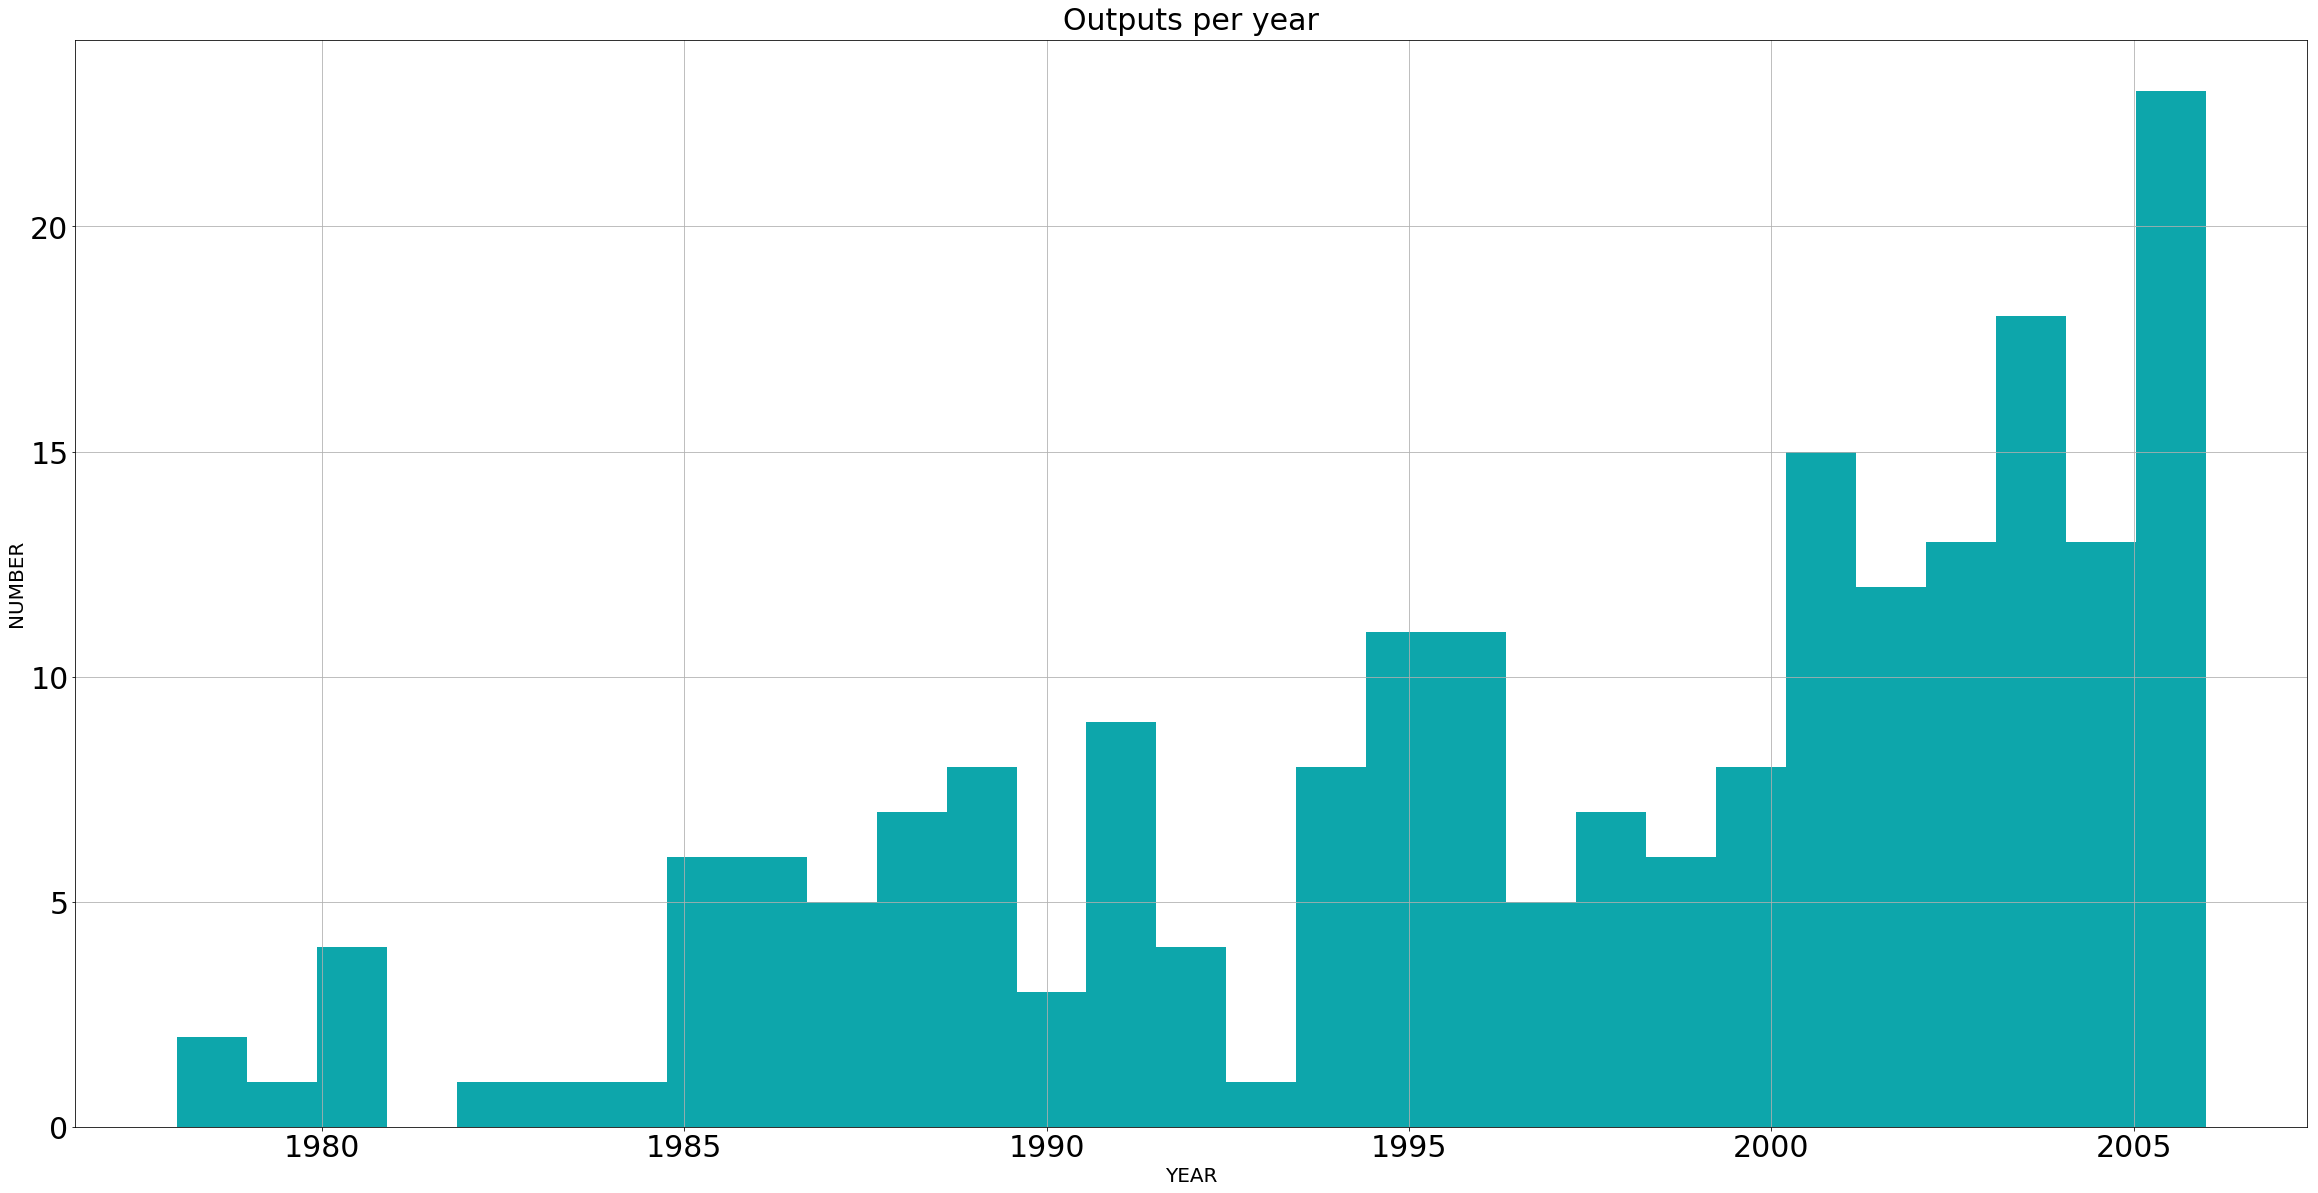

In [5]:
# Basic numeric plot

plt.hist(df["YEAR"], color=(0.05, 0.65, 0.67, 1), bins=29)

plt.xlabel('YEAR')
plt.ylabel('NUMBER')
plt.grid(True)
plt.title('Outputs per year')

# We prepare the plot  
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)
# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=30)
plot.tick_params(axis='both', which='minor', labelsize=30)

plt.show(fig)

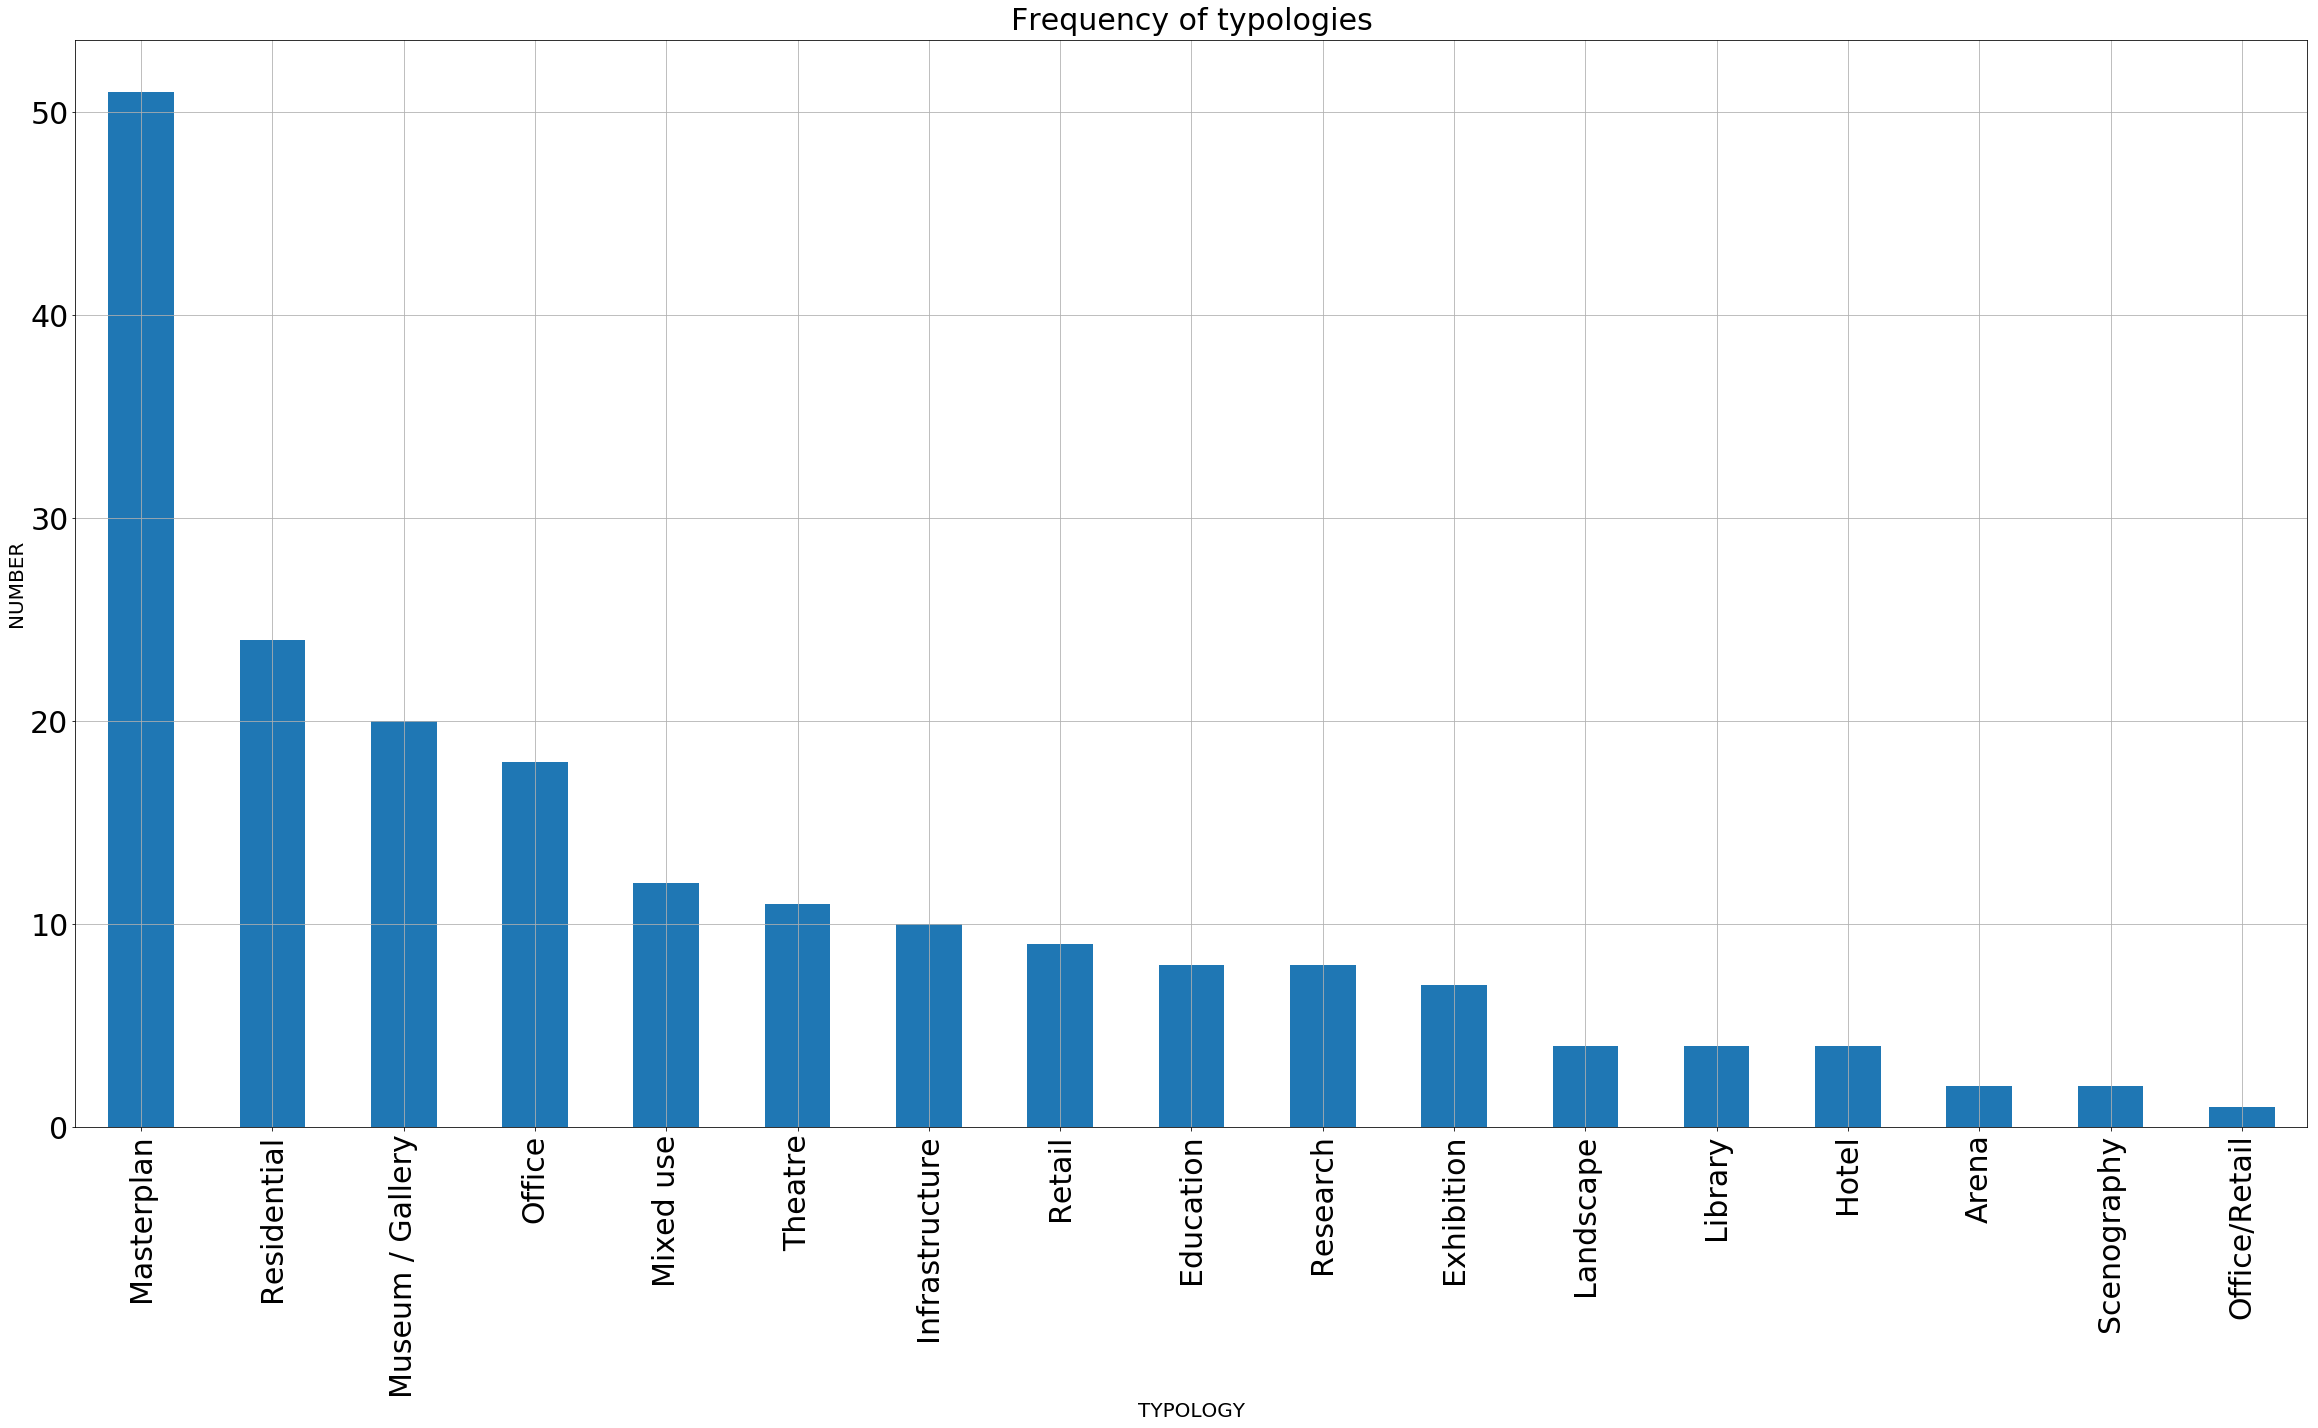

In [6]:
# Basic frequency plot

freq = df["TYPOLOGY_01"].value_counts()

freq.plot.bar()

plt.xlabel('TYPOLOGY')
plt.ylabel('NUMBER')
plt.grid(True)
plt.title('Frequency of typologies')

# We prepare the plot  
fig = plt.figure(1)
# We define a fake subplot that is in fact only the plot.  
plot = fig.add_subplot(111)
# We change the fontsize of minor ticks label 
plot.tick_params(axis='both', which='major', labelsize=30)
plot.tick_params(axis='both', which='minor', labelsize=30)

plt.show(fig)

In [7]:
df.groupby(["TYPE", "YEAR"]).size()

TYPE         YEAR
Lecture      1989     1
             1995     1
             2006     1
Project      1978     1
             1979     1
             1980     4
             1982     1
             1983     1
             1984     1
             1985     6
             1986     6
             1987     5
             1988     7
             1989     7
             1990     3
             1991     9
             1992     4
             1993     1
             1994     8
             1995     9
             1996    11
             1997     5
             1998     7
             1999     6
             2000     8
             2001    11
             2002    12
             2003    12
             2004    17
             2005    13
             2006    19
Publication  1978     1
             1995     1
             2001     4
             2003     1
             2004     1
             2006     3
dtype: int64

In [8]:
# Get typology counts by year

years = df["DECADE"].unique()
items = {}
items['TOTAL'] = df["TYPOLOGY_01"].value_counts()

for x in years:
    y = df["TYPOLOGY_01"][df["DECADE"] == x].value_counts()
    items[x] = y
    
typology_df = pd.DataFrame.from_dict(items).sort_values("TOTAL", axis=0, ascending=False)
typology_df.head(20)

,1970s,1980s,1990s,2000s,TOTAL
Masterplan,NaN,10.0,20,21.0,51
Residential,NaN,9.0,7,8.0,24
Museum / Gallery,NaN,3.0,5,12.0,20
Office,2.0,5.0,6,5.0,18
Mixed use,NaN,NaN,2,10.0,12
Theatre,NaN,1.0,4,6.0,11
Infrastructure,NaN,3.0,4,3.0,10
Retail,NaN,NaN,2,7.0,9
Education,NaN,1.0,2,5.0,8
Research,NaN,NaN,1,7.0,8


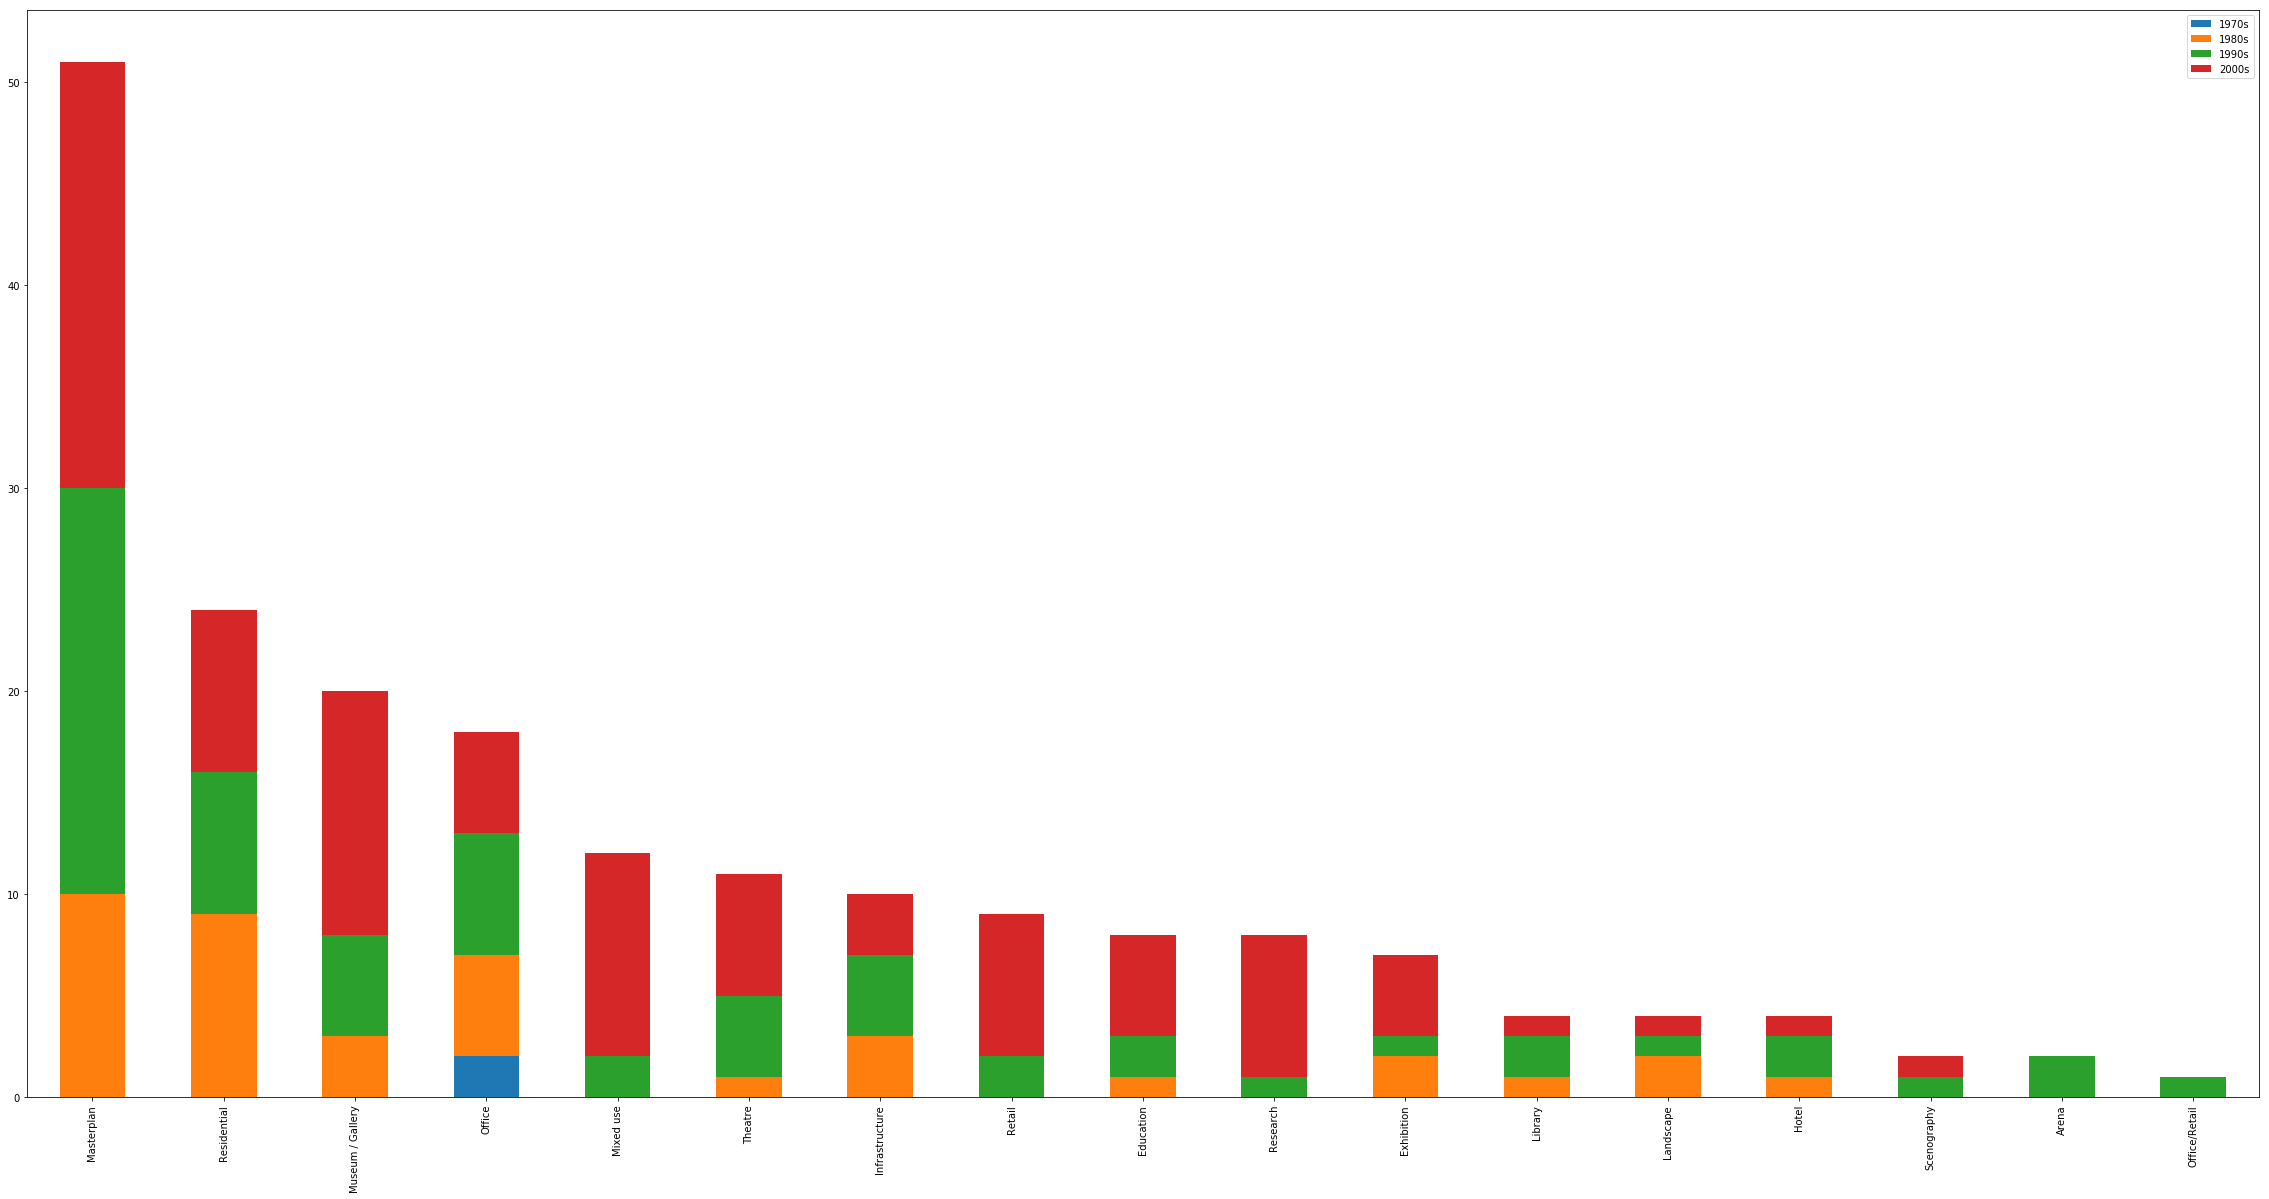

In [9]:
# Plot typology counts by year
fig = typology_df.iloc[:, :-1].plot.bar(stacked=True)

# plt.show(fig)


True     196
False     13
Name: REM?, dtype: int64


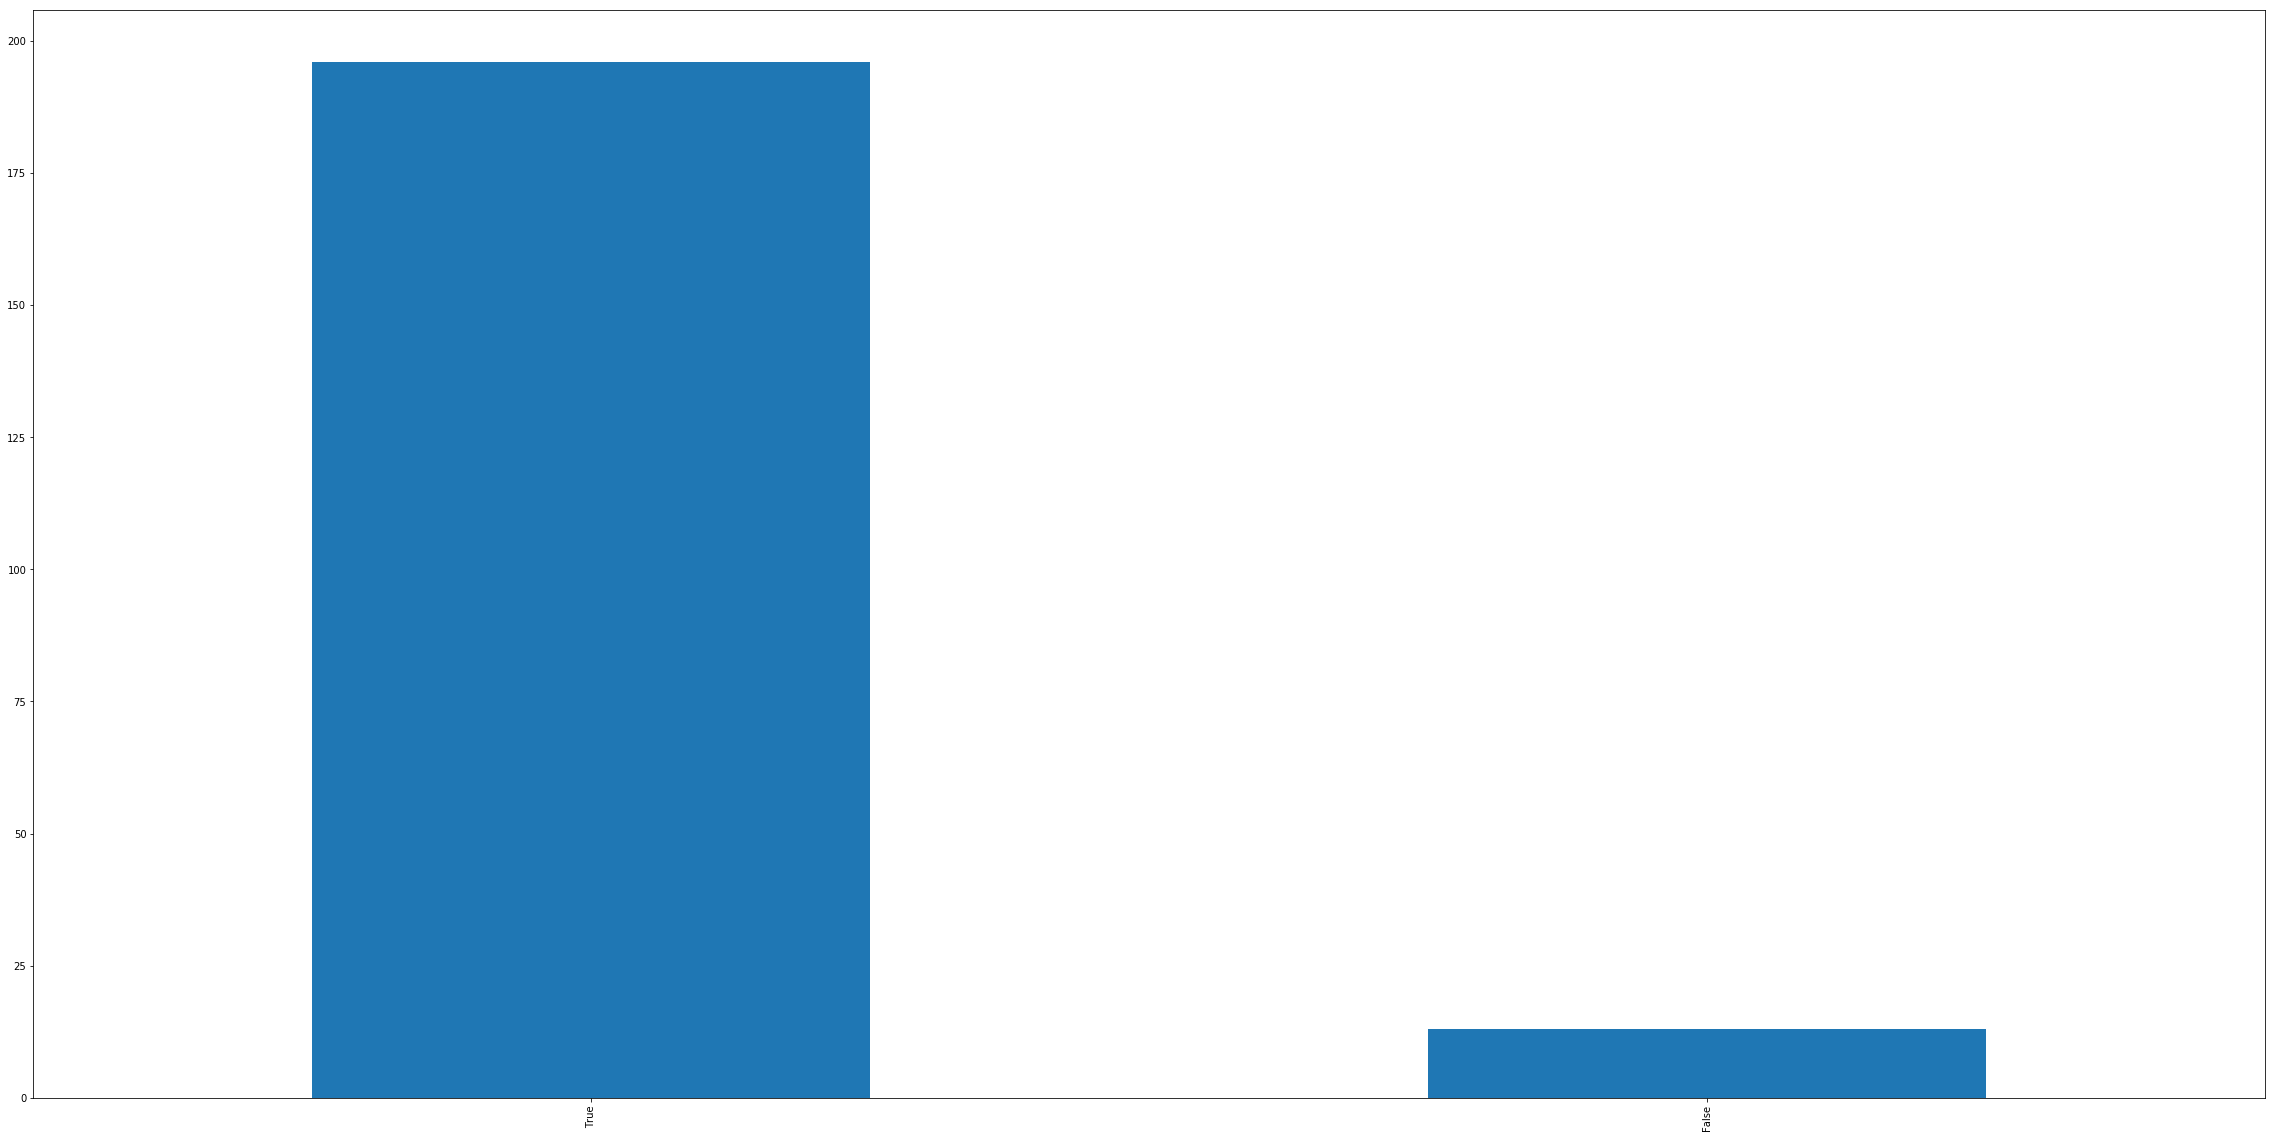

In [10]:
# REM count

df["REM?"].value_counts().plot.bar()
print df["REM?"].value_counts()

In [17]:
# Organise columns
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.head(1)

,DECADE,IMG_,DESCRIPTION,URL STRING,YEAR,TYPE,STATUS,TYPOLOGY_01,REM?,TEAM_01,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,1970s,1,Delirious New York,Delirious-New-York,1978,Publication,Publication,NaN,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Get full team list

team = df.loc[:, 'TEAM_01':]
team_count = pd.Series(team.squeeze().values.ravel()).value_counts()
# print len(team_count)

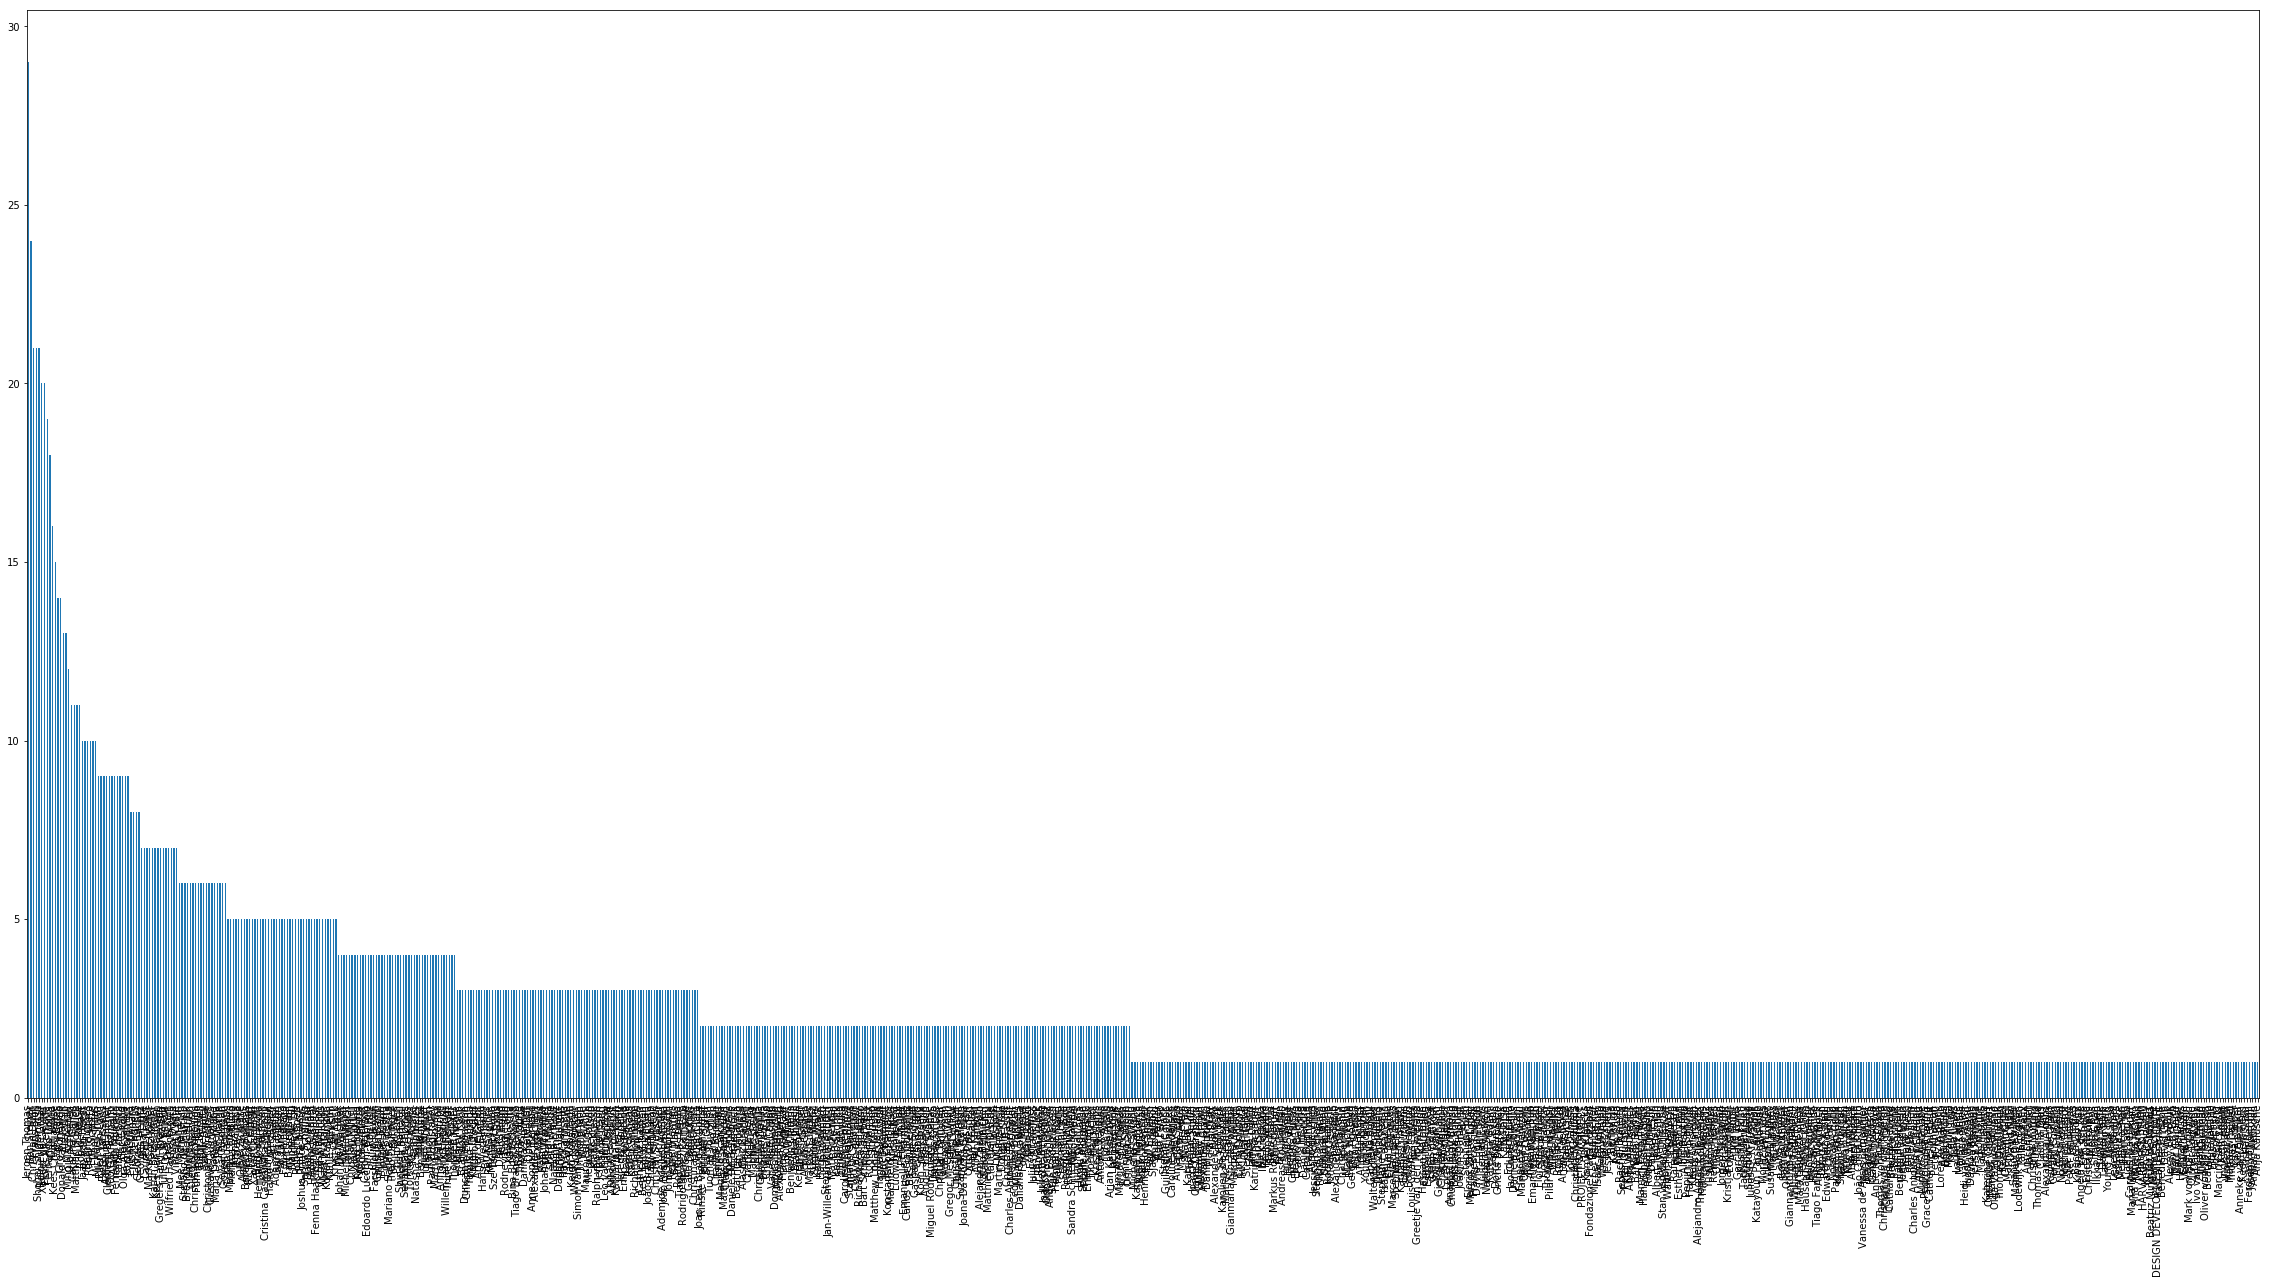

In [19]:
# plot full team list
team_count.plot.bar()

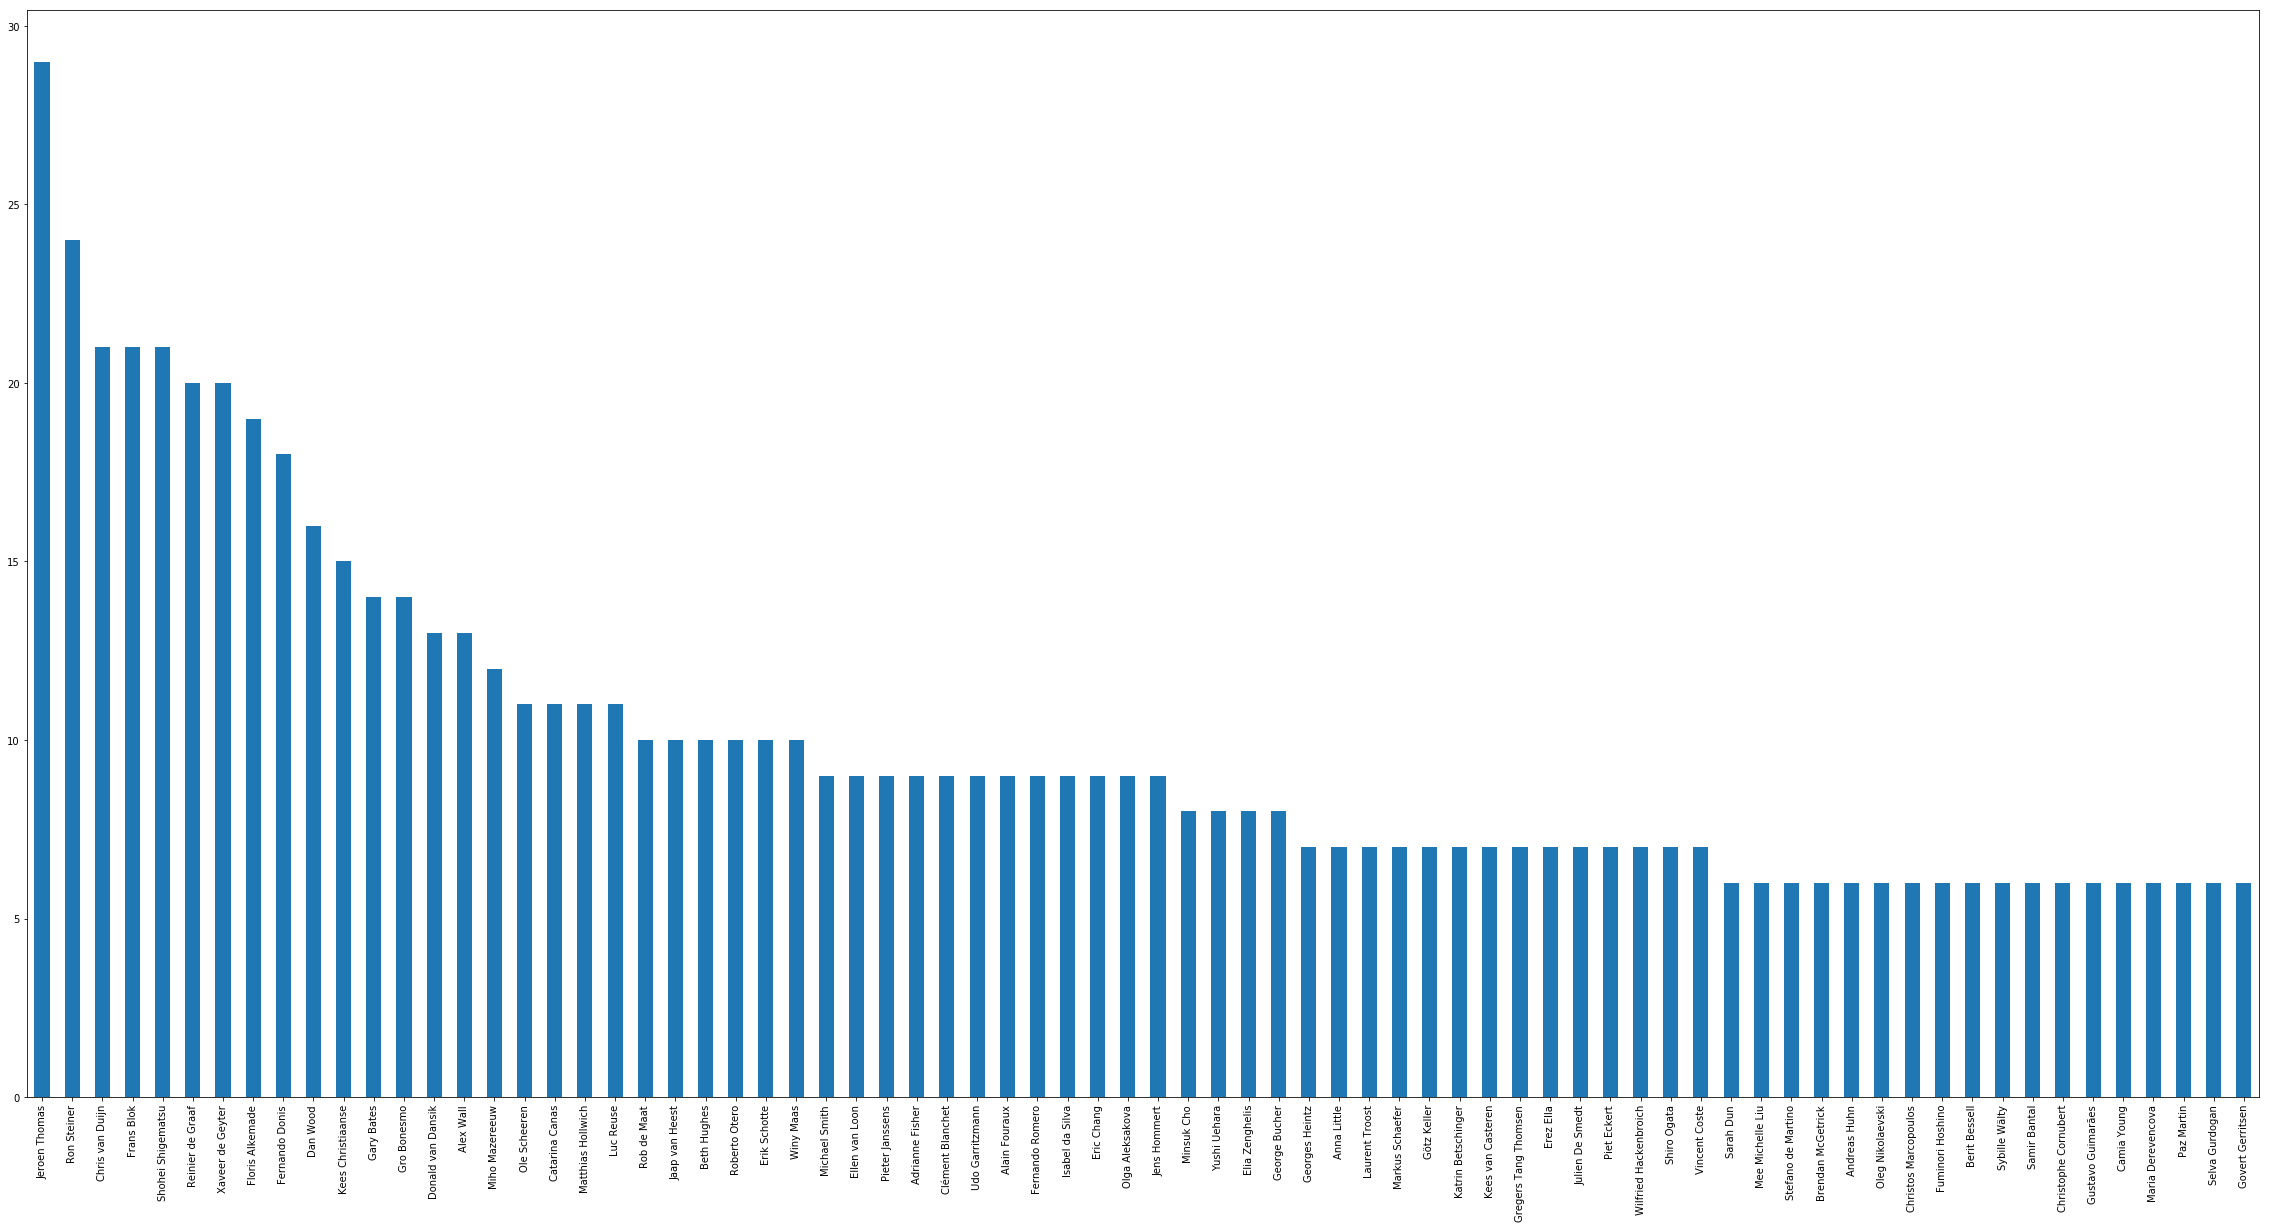

In [20]:
# Plot team members above 5 projects
team_count[team_count > 5].plot.bar()
team_5 = team_count[team_count > 5]
team_5.to_csv("team-above-5.csv")


In [23]:
one_project_team = team_count[team_count == 1]
num_one_project_team = len(one_project_team)
print "Number of people only on one project: " + str(num_one_project_team)
print one_project_team

one_project_team.to_csv("team_one.csv")

Number of people only on one project: 418
Alice Wong                1
Michelle Lavigne          1
Karolina Machalica        1
Stuart Maddocks           1
Adam Wiseman              1
Henrike Kortemeyer        1
Fanny Smelik              1
Paul Engelen              1
Sjaak Roodbol             1
Shuo Wang                 1
Ada Pelder                1
Joao Ferrao               1
Stefanie Rack             1
Guillaume Colboc          1
So Jung Lee               1
Caroline Andersen         1
Casey Mack                1
Amanda Sebris             1
Lotte Adolf               1
Marc Peeters              1
Nadia Tazi                1
Katrien van Dijk          1
Florian Seidel            1
João Prates Ruivo         1
Claire Destrebecq         1
Guillaume Yersin          1
Matthew Brown             1
Alexander Giarlis         1
Daniel Ostrowski          1
Mark McVay                1
                         ..
Paul de Graaf             1
Herman Jacobs             1
Edward Neale              1
Verena